<a href="https://colab.research.google.com/github/solobala/CVML10/blob/main/003_watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Водораздел
http://cmm.ensmp.fr/~beucher/wtshed.html

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.8.0


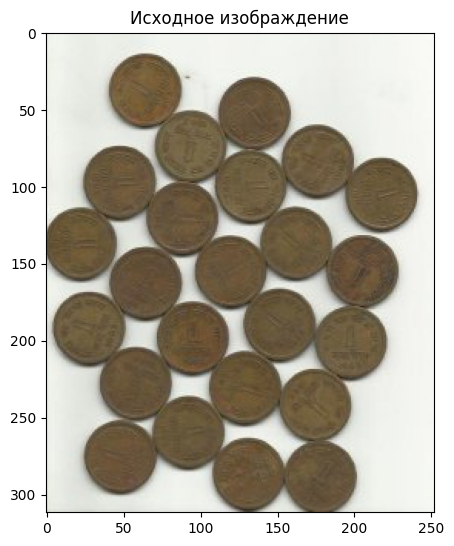

In [3]:
img = cv2.imread('coins.jpg')

fig = plt.figure(figsize=(5, 8))
plt.title('Исходное изображдение')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## Сегментируем по порогу

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

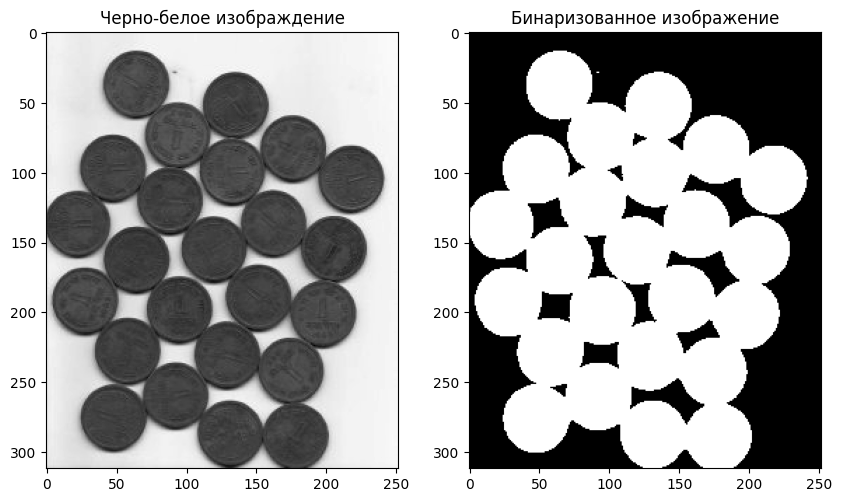

In [5]:
fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Черно-белое изображдение')
plt.imshow(gray, cmap='gray');

plt.subplot(1, 2, 2)
plt.title('Бинаризованное изображение')
plt.imshow(thresh, cmap='gray');

## Для каждого пикселя вычисляем расстояние до ближашей грани

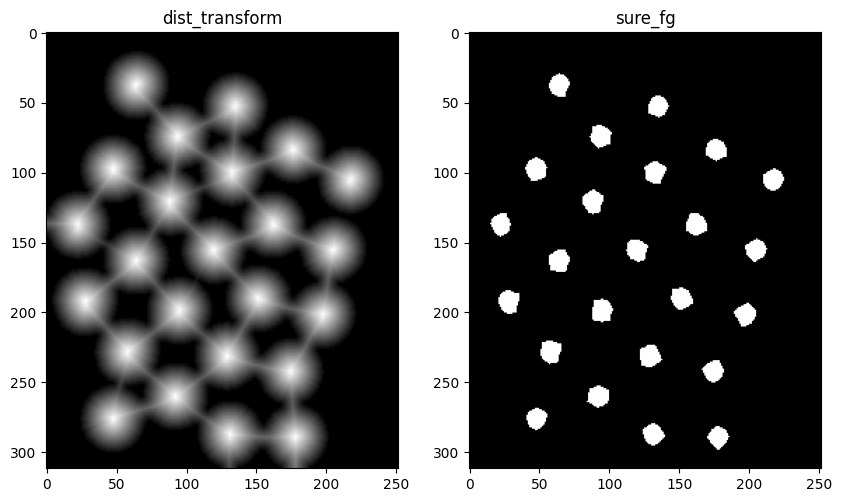

In [6]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)

fig = plt.figure(figsize=(10, 8))

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(dist_transform, cmap='gray');
subplot.set_title('dist_transform');

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(sure_fg, cmap='gray');
subplot.set_title('sure_fg');

## Выделяем зону неопределенности между монетами и фоном

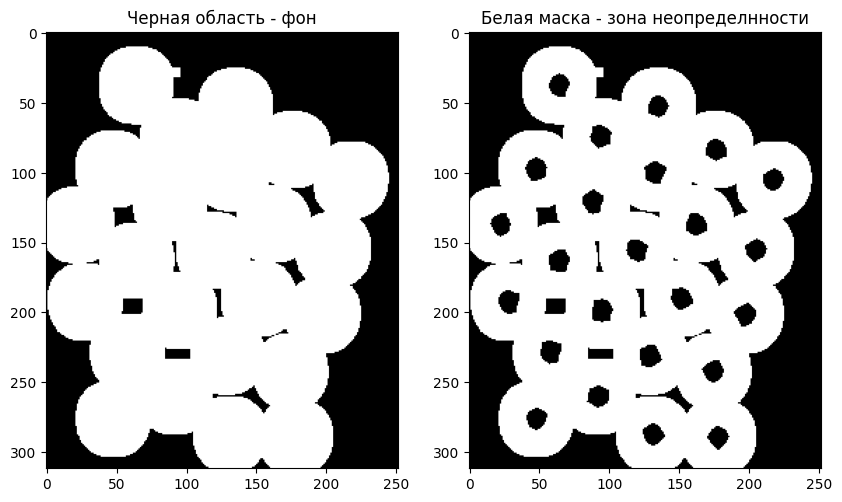

In [7]:
# применяем операцию dilate для выделения зоны фона
kernel = np.ones((3,3), np.uint8) # box-фильтр
sure_bg = cv2.dilate(thresh,kernel,iterations=3)

# зона неопределенности - область между центрами монет и фоном
unknown = cv2.subtract(sure_bg, sure_fg)


fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Черная область - фон')
plt.imshow(sure_bg, cmap='gray');

plt.subplot(1, 2, 2)
plt.title('Белая маска - зона неопределнности')
plt.imshow(unknown, cmap='gray');

## Задаем маркеры начального приближения

In [8]:
# объединяем соседние пиксели в связные компоненты
# в результате для каждого пикселя известен номер связной компоненты
# для пикселей фона (с нулевой интенсивностью) номер компоненты равен 0
ret, markers = cv2.connectedComponents(sure_fg)
# инкрементируем значения компонент на единицу, у фона теперь кластер 1
markers = markers + 1
# неизвестную область обозначаем свободной
markers[unknown==255] = 0

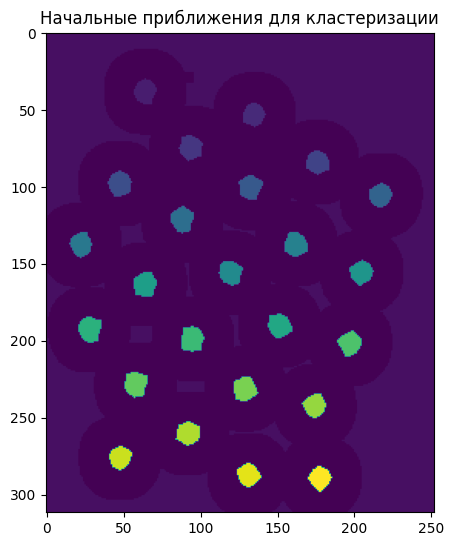

In [9]:
fig = plt.figure(figsize=(5, 8))
plt.title('Начальные приближения для кластеризации')
plt.imshow(markers);

## Применяем алгоритм водораздела для сегментации

In [10]:
markers = cv2.watershed(img, markers)

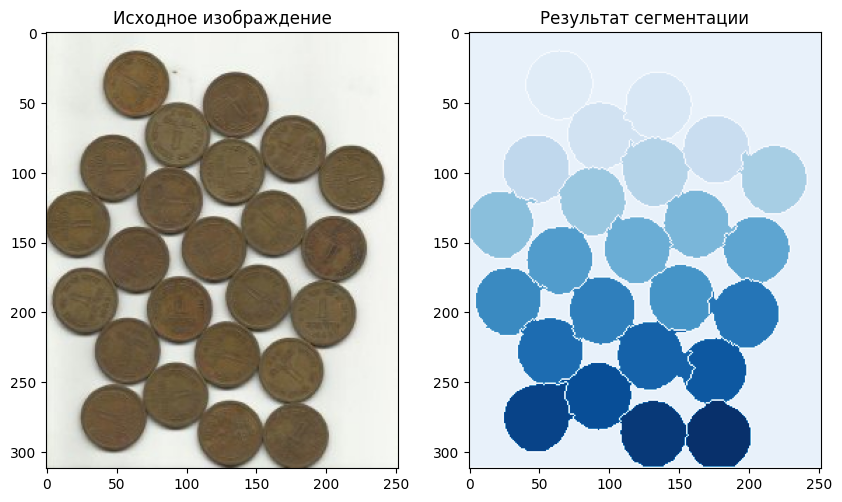

In [11]:
fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Исходное изображдение')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

plt.subplot(1, 2, 2)
plt.title('Результат сегментации')
plt.imshow(markers, cmap=plt.cm.Blues);

## Визуализируем границы кластеров

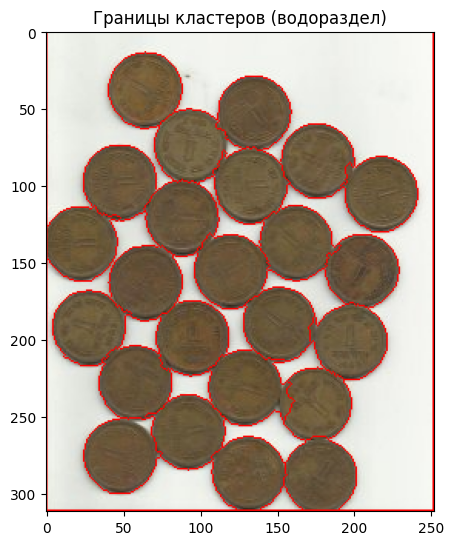

In [12]:
fig = plt.figure(figsize=(5, 8), dpi=100)

img[markers == -1] = [0,0,255]
plt.title('Границы кластеров (водораздел)')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));